In [1]:
# import libraries
import matplotlib.pyplot as plt  
import matplotlib.patches as patches
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerPatch
import pandas as pd
import numpy as np
%matplotlib inline

### Mean field model

In [2]:
# Model 16 data

# Cell line: Vero 
vero_vsvg = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_22.csv", delimiter="\t")
vero_ebov = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_23.csv", delimiter="\t")
vero_marv = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_24.csv", delimiter="\t")

# Cell line: RoNi
roni_vsvg = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_25.csv", delimiter="\t")
roni_ebov = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_26.csv", delimiter="\t")
roni_marv = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_27.csv", delimiter="\t")

# Cell line: Paki
paki_vsvg = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_28.csv", delimiter="\t")
paki_ebov = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_29.csv", delimiter="\t") 
paki_marv = pd.read_csv("Model16_data/mf-proportions-Viral_Dynamics_sweep_30.csv", delimiter="\t")

# add computed R0 values 
vero_vsvg['r_naught'] = 8.722525
vero_ebov['r_naught'] = 5.417434
vero_marv['r_naught'] = 3.453351 

roni_vsvg['r_naught'] = 10.904983
roni_ebov['r_naught'] = 3.043875
roni_marv['r_naught'] = 5.463803 

paki_vsvg['r_naught'] = 6.185309
paki_ebov['r_naught'] = 18.818669
paki_marv['r_naught'] = 8.841069

In [3]:
# calculate Reff for each cell line - virus combination over 200 hours. Reff = R0 * Ps
# add Psae = Ps+Pe+Pa
for df in [vero_vsvg, vero_ebov, vero_marv, roni_vsvg, roni_ebov, roni_marv, paki_vsvg, paki_ebov, paki_marv]: 
    df['Reff'] = df['r_naught']*df['Ps']
    df['Psae'] = df['Ps'] + df['Pa'] + df['Pe']

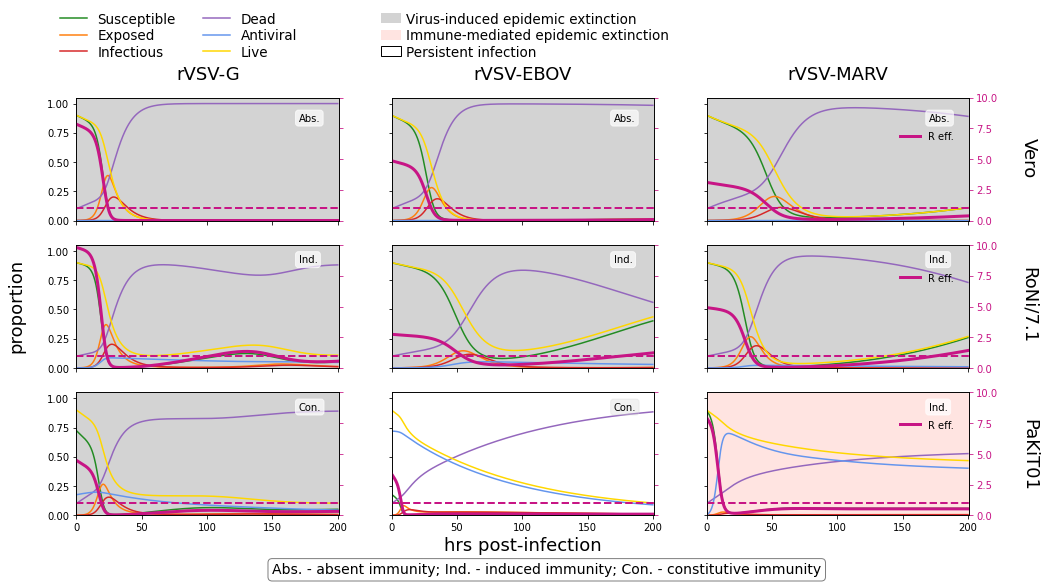

In [4]:
fig, axs = plt.subplots(3,3, figsize = (16,8), sharey = True, sharex = True) 

################################################################################################################################
# Populating the main subplots
def plot_subplots(df, i, j, axs, facecolor):
    axs[i,j].plot(df['t'], df['Ps'], color = 'forestgreen')
    axs[i,j].plot(df['t'], df['Pe'], color = 'tab:orange')
    axs[i,j].plot(df['t'], df['Pi'], color = 'tab:red')
    axs[i,j].plot(df['t'], df['Pd'], color = 'tab:purple')
    axs[i,j].plot(df['t'], df['Pa'], color = 'cornflowerblue')
    axs[i,j].plot(df['t'], df['Psae'], color = 'gold')
    axs[i,j].set_facecolor(facecolor)

plot_subplots(vero_vsvg, 0,0, axs, facecolor = 'lightgray')
plot_subplots(vero_ebov, 0,1, axs, facecolor = 'lightgray')
plot_subplots(vero_marv, 0,2, axs, facecolor = 'lightgray')
plot_subplots(roni_vsvg, 1,0, axs, facecolor = 'lightgray')
plot_subplots(roni_ebov, 1,1, axs, facecolor = 'lightgray')
plot_subplots(roni_marv, 1,2, axs, facecolor = 'lightgray')
plot_subplots(paki_vsvg, 2,0, axs, facecolor = 'lightgray')
plot_subplots(paki_ebov, 2,1, axs, facecolor = 'white')
plot_subplots(paki_marv, 2,2, axs, facecolor = 'mistyrose')

for j in [0,1,2]:
    axs[0,j].text(170, 0.85,'Abs.', bbox=dict(boxstyle='round,pad=0.3', color = 'white', alpha = 0.7))
for j in [0,1,2]:
    axs[1,j].text(170, 0.9,'Ind.', bbox=dict(boxstyle='round,pad=0.3', color = 'white',alpha = 0.7))

axs[2,0].text(170, 0.9,'Con.', bbox=dict(boxstyle='round,pad=0.3', color = 'white', alpha = 0.7))
axs[2,1].text(170, 0.9,'Con.', bbox=dict(color = "lightgray", boxstyle='round,pad=0.3', alpha = 0.3))
axs[2,2].text(170, 0.9,'Ind.', bbox=dict(boxstyle='round,pad=0.3', color = 'white', alpha = 0.7)) 

################################################################################################################################
# Designing the plot
# Virus strain labels
axs[0,0].set_title(r'rVSV-G', fontsize = 18, y = 1.1)
axs[0,1].set_title(r'rVSV-EBOV', fontsize = 18, y = 1.1)
axs[0,2].set_title(r'rVSV-MARV', fontsize = 18, y = 1.1)

# Cell line labels
axs[0,2].text(240, 0.4, r'Vero', rotation = -90, fontsize = 18)
axs[1,2].text(240, 0.25, r'RoNi/7.1', rotation = -90, fontsize = 18)
axs[2,2].text(240, 0.25, r'PaKiT01', rotation = -90, fontsize = 18)

# X-Axis: Hours post-infection
axs[2,1].set_xlabel(r'hrs post-infection', fontsize = 18, y = -0.1) 
axs[2,0].text(360, -0.5, "Abs. - absent immunity; Ind. - induced immunity; Con. - constitutive immunity",
              fontsize = 14, bbox=dict(facecolor='none', edgecolor='gray', boxstyle='round'), ha = "center")

# Y-Axis: proportions
#axs[1,0].set_ylabel(r'proportion', fontsize = 18, x = -1.7)
axs[1,0].text(-53, 0.17, r'proportion', rotation = 90, fontsize = 18)

labels = ['Susceptible', 'Exposed', 'Infectious', 'Dead', 'Antiviral', 'Live']
fig.legend(labels=labels,loc="upper left", ncol=2,handleheight=0.8, labelspacing=0.2, frameon=False, fontsize = 13.5,
           bbox_to_anchor=(0.1,1.02))
plt.subplots_adjust(top=0.85)

### Add second legend for the outcome
class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = 20
        h = 10

        # create
        p = patches.Rectangle(xy=(x, y), width=w, height=h)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]

rect_gr = patches.Rectangle((0,0), 1, 1, facecolor='lightgray')
rect_rose = patches.Rectangle((0,0), 1,1, facecolor='mistyrose')
rect_white = patches.Rectangle((0,0), 1,1, facecolor='white', edgecolor = "black")

fig.legend((rect_gr, rect_rose, rect_white), ('Virus-induced epidemic extinction', 'Immune-mediated epidemic extinction', 'Persistent infection'),
            handler_map={
               patches.Rectangle: HandlerRect()
            }, loc = 'upper right', frameon = False, ncol = 1, fontsize = 13.5, 
           bbox_to_anchor=(0.65,1.02),handleheight=0.8, labelspacing=0.2 ) 

plt.yticks(np.arange(0, 1.25, 0.25))
plt.ylim(bottom = 0)
plt.xlim(left = 0, right = 201)
###########################################################################################################################

# SECONDARY AXES FOR R EFFECTIVE

ax0 = dict() 

def vero_Reff(df, axs, j):
    ax0[j] = axs[0,j].twinx()
    ax0[j].set_ylim(bottom = 0, top = 10)
    ax0[j].set_yticks(np.arange(0,12.5,2.5))
    ax0[j].tick_params(axis='y', right = True, color = 'mediumvioletred')
    ax0[j].plot(df['t'], df['Reff'], color = 'mediumvioletred', linestyle = "solid", lw = 3) 
    ax0[j].axhline(y=1, color='mediumvioletred', linestyle='dashed', linewidth = 2)
        
    if j == 0 or j == 1: 
        ax0[j].axes.yaxis.set_ticklabels([])
        
    if j == 2:
        ax0[j].tick_params(axis='y', colors='mediumvioletred')
        ax0[j].legend(labels=('R eff.',),loc= (0.72, 0.61), handleheight=1, frameon=False)
        ax0[j].get_shared_y_axes().join(ax0[j-2], ax0[j-1], ax0[j])
        
ax1 = dict() 

def roni_Reff(df, axs, j):
    ax1[j] = axs[1,j].twinx()
    ax1[j].set_ylim(bottom = 0, top = 10)
    ax1[j].set_yticks(np.arange(0,12.5,2.5))
    ax1[j].tick_params(axis='y', right = True, color = 'mediumvioletred')
    ax1[j].plot(df['t'], df['Reff'], color = 'mediumvioletred', linestyle = "solid", lw = 3) 
    ax1[j].axhline(y=1, color='mediumvioletred', linestyle='dashed', linewidth = 2)
        
    if j == 0 or j == 1: 
        ax1[j].axes.yaxis.set_ticklabels([])
        
    if j == 2:
        ax1[j].tick_params(axis='y', colors='mediumvioletred')
        ax1[j].legend(labels=('R eff.',),loc= (0.72, 0.66), handleheight=1, frameon=False)
        ax1[j].get_shared_y_axes().join(ax1[j-2], ax1[j-1], ax1[j])

ax2 = dict()
def paki_Reff(df, axs, j):
    ax2[j] = axs[2,j].twinx()
    ax2[j].set_ylim(bottom = 0, top = 10)
    ax2[j].set_yticks(np.arange(0,12.5,2.5))
    ax2[j].tick_params(axis='y', right = True, color = 'mediumvioletred')
    ax2[j].plot(df['t'], df['Reff'], color = 'mediumvioletred', linestyle = "solid", lw = 3) 
    ax2[j].axhline(y=1, color='mediumvioletred', linestyle='dashed', linewidth = 2)
        
    if j == 0 or j == 1: 
        ax2[j].axes.yaxis.set_ticklabels([])
        
    if j == 2:
        ax2[j].tick_params(axis='y', colors='mediumvioletred')
        ax2[j].legend(labels=('R eff.',),loc= (0.72, 0.66), handleheight=1, frameon=False)
        ax2[j].get_shared_y_axes().join(ax2[j-2], ax2[j-1], ax2[j])
        
vero_Reff(vero_vsvg, axs, j = 0)
vero_Reff(vero_ebov, axs, j = 1)
vero_Reff(vero_marv, axs, j = 2)

roni_Reff(roni_vsvg, axs, j = 0)
roni_Reff(roni_ebov, axs, j = 1)
roni_Reff(roni_marv, axs, j = 2)

paki_Reff(paki_vsvg, axs, j = 0)
paki_Reff(paki_ebov, axs, j = 1)
paki_Reff(paki_marv, axs, j = 2)

#plt.savefig('Model16_data/plots/model16_mf.png', dpi = 1200)
plt.show()

### Averaging over 10 simulations of stochastic spatial model

In [5]:
# Cell line: Vero 
vero_vsvg = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_22.csv", delimiter="\t")
vero_ebov = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_23.csv", delimiter="\t")
vero_marv = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_24.csv", delimiter="\t")

# Cell line: RoNi
roni_vsvg = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_25.csv", delimiter="\t")
roni_ebov = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_26.csv", delimiter="\t")
roni_marv = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_27.csv", delimiter="\t")

# Cell line: Paki
paki_vsvg = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_28.csv", delimiter="\t")
paki_ebov = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_29.csv", delimiter="\t") 
paki_marv = pd.read_csv("Model16_data/avg-spatial-proportions-Viral_Dynamics_sweep_30.csv", delimiter="\t") 

In [6]:
# Model 14. SD spatial proportions 

# Cell line: Vero 
vero_vsvg_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_22.csv", delimiter="\t")
vero_ebov_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_23.csv", delimiter="\t")
vero_marv_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_24.csv", delimiter="\t")

# Cell line: RoNi
roni_vsvg_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_25.csv", delimiter="\t")
roni_ebov_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_26.csv", delimiter="\t")
roni_marv_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_27.csv", delimiter="\t")

# Cell line: Paki
paki_vsvg_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_28.csv", delimiter="\t")
paki_ebov_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_29.csv", delimiter="\t") 
paki_marv_sd = pd.read_csv("Model16_data/sd-spatial-proportions-Viral_Dynamics_sweep_30.csv", delimiter="\t")

In [7]:
# add Psae = Ps+Pe+Pa
for df in [vero_vsvg, vero_ebov, vero_marv, roni_vsvg, roni_ebov, roni_marv, paki_vsvg, paki_ebov, paki_marv]: 
    df['Psae'] = df['Ps'] + df['Pa'] + df['Pe']

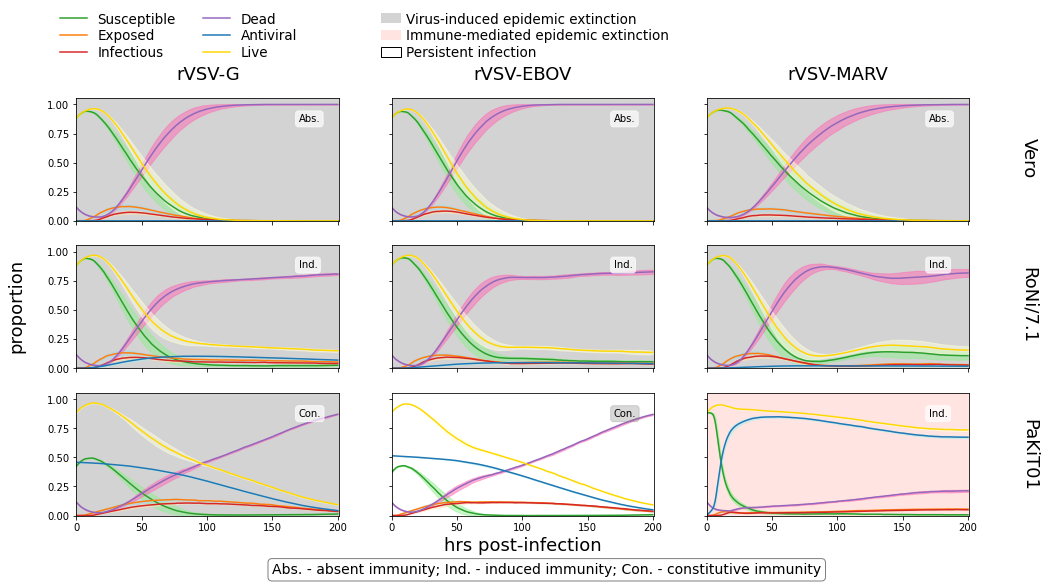

In [11]:
fig, axs = plt.subplots(3,3, figsize = (16,8), sharey = True, sharex = True) 

################################################################################################################################
# Populating the main subplots
def plot_subplots(df, i, j, axs, facecolor):
    axs[i,j].plot(df['t'], df['Ps'], color = 'tab:green')
    axs[i,j].plot(df['t'], df['Pe'], color = 'tab:orange')
    axs[i,j].plot(df['t'], df['Pi'], color = 'tab:red')
    axs[i,j].plot(df['t'], df['Pd'], color = 'tab:purple')
    axs[i,j].plot(df['t'], df['Pa'], color = 'tab:blue')
    axs[i,j].plot(df['t'], df['Psae'], color = 'gold')
    axs[i,j].set_facecolor(facecolor)

plot_subplots(vero_vsvg, 0,0, axs, facecolor = 'lightgray')
plot_subplots(vero_ebov, 0,1, axs, facecolor = 'lightgray')
plot_subplots(vero_marv, 0,2, axs, facecolor = 'lightgray')
plot_subplots(roni_vsvg, 1,0, axs, facecolor = 'lightgray')
plot_subplots(roni_ebov, 1,1, axs, facecolor = 'lightgray')
plot_subplots(roni_marv, 1,2, axs, facecolor = 'lightgray')
plot_subplots(paki_vsvg, 2,0, axs, facecolor = 'lightgray')
plot_subplots(paki_ebov, 2,1, axs, facecolor = 'white')
plot_subplots(paki_marv, 2,2, axs, facecolor = 'mistyrose')

for j in [0,1,2]:
    axs[0,j].text(170, 0.85,'Abs.', bbox=dict(boxstyle='round,pad=0.3', color = 'white', alpha = 0.7))
for j in [0,1,2]:
    axs[1,j].text(170, 0.86,'Ind.', bbox=dict(boxstyle='round,pad=0.3', color = 'white',alpha = 0.7))

axs[2,0].text(170, 0.85,'Con.', bbox=dict(boxstyle='round,pad=0.3', color = 'white', alpha = 0.7))
axs[2,1].text(170, 0.85,'Con.', bbox=dict(color = "gray", boxstyle='round,pad=0.3', alpha = 0.3))
axs[2,2].text(170, 0.85,'Ind.', bbox=dict(boxstyle='round,pad=0.3', color = 'white', alpha = 0.7)) 

###############################################################################################################################
def CI_plot(df1, df2, i, j, axs):
    axs[i,j].fill_between(df1['t'], df1['Ps']-df2['Ps'], df1['Ps']+df2['Ps'], color='lightgreen', alpha=0.5)
    axs[i,j].fill_between(df1['t'], df1['Pe']-df2['Pe'], df1['Pe']+df2['Pe'], color='lightblue', alpha=0.5)
    axs[i,j].fill_between(df1['t'], df1['Pi']-df2['Pi'], df1['Pi']+df2['Pi'], color='moccasin', alpha=0.5)
    axs[i,j].fill_between(df1['t'], df1['Pd']-df2['Pd'], df1['Pd']+df2['Pd'], color='hotpink', alpha=0.5)
    axs[i,j].fill_between(df1['t'], df1['Pa']-df2['Pa'], df1['Pa']+df2['Pa'], color='paleturquoise', alpha=0.5)
    axs[i,j].fill_between(df1['t'], df1['Psae']-df2['Psae'], df1['Psae']+df2['Psae'], color='lightyellow', alpha=0.5)
    
CI_plot(vero_vsvg, vero_vsvg_sd, 0,0, axs)
CI_plot(vero_ebov, vero_ebov_sd, 0,1, axs)
CI_plot(vero_marv, vero_marv_sd, 0,2, axs)
CI_plot(roni_vsvg, roni_vsvg_sd, 1,0, axs)
CI_plot(roni_ebov, roni_ebov_sd, 1,1, axs)
CI_plot(roni_marv, roni_marv_sd, 1,2, axs)
CI_plot(paki_vsvg, paki_vsvg_sd, 2,0, axs)
CI_plot(paki_ebov, paki_ebov_sd, 2,1, axs)
CI_plot(paki_marv, paki_marv_sd, 2,2, axs)

################################################################################################################################
# Designing the plot
# Virus strain labels
axs[0,0].set_title(r'rVSV-G', fontsize = 18, y = 1.1)
axs[0,1].set_title(r'rVSV-EBOV', fontsize = 18, y = 1.1)
axs[0,2].set_title(r'rVSV-MARV', fontsize = 18, y = 1.1)

# Cell line labels
axs[0,2].text(240, 0.4, r'Vero', rotation = -90, fontsize = 18)
axs[1,2].text(240, 0.25, r'RoNi/7.1', rotation = -90, fontsize = 18)
axs[2,2].text(240, 0.25, r'PaKiT01', rotation = -90, fontsize = 18)

# X-Axis: Hours post-infection
axs[2,1].set_xlabel(r'hrs post-infection', fontsize = 18, y = -0.1) 
axs[2,0].text(360, -0.5, "Abs. - absent immunity; Ind. - induced immunity; Con. - constitutive immunity",
              fontsize = 14, bbox=dict(facecolor='none', edgecolor='gray', boxstyle='round'), ha = "center")

# Y-Axis: proportions
#axs[1,0].set_ylabel(r'proportion', fontsize = 18, x = -0.1)
axs[1,0].text(-53, 0.17, r'proportion', rotation = 90, fontsize = 18)

labels = ['Susceptible', 'Exposed', 'Infectious', 'Dead', 'Antiviral', 'Live']
fig.legend(labels=labels,loc="upper left", ncol=2,handleheight=0.8, labelspacing=0.2, frameon=False, fontsize = 13.5,
           bbox_to_anchor=(0.1,1.02))
plt.subplots_adjust(top=0.85)

### Add second legend for the outcome
class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = 20
        h = 10

        # create
        p = patches.Rectangle(xy=(x, y), width=w, height=h)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]

rect_gr = patches.Rectangle((0,0), 1, 1, facecolor='lightgray')
rect_rose = patches.Rectangle((0,0), 1,1, facecolor='mistyrose')
rect_white = patches.Rectangle((0,0), 1,1, facecolor='white', edgecolor = "black")

fig.legend((rect_gr, rect_rose, rect_white), ('Virus-induced epidemic extinction', 'Immune-mediated epidemic extinction', 'Persistent infection'),
            handler_map={
               patches.Rectangle: HandlerRect()
            }, loc = 'upper right', frameon = False, ncol = 1, fontsize = 13.5, 
           bbox_to_anchor=(0.65,1.02),handleheight=0.8, labelspacing=0.2 ) 

plt.yticks(np.arange(0, 1.25, 0.25))
plt.ylim(bottom = 0)
plt.xlim(left = 0, right = 201)

#plt.savefig('Model14_data/plots/model16_spatial.png', dpi = 1200)
plt.show()